# DATA ISNERTION

# 0.0 IMPORTS

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from IPython.core.display       import HTML
import warnings
import seaborn                  as sns


def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


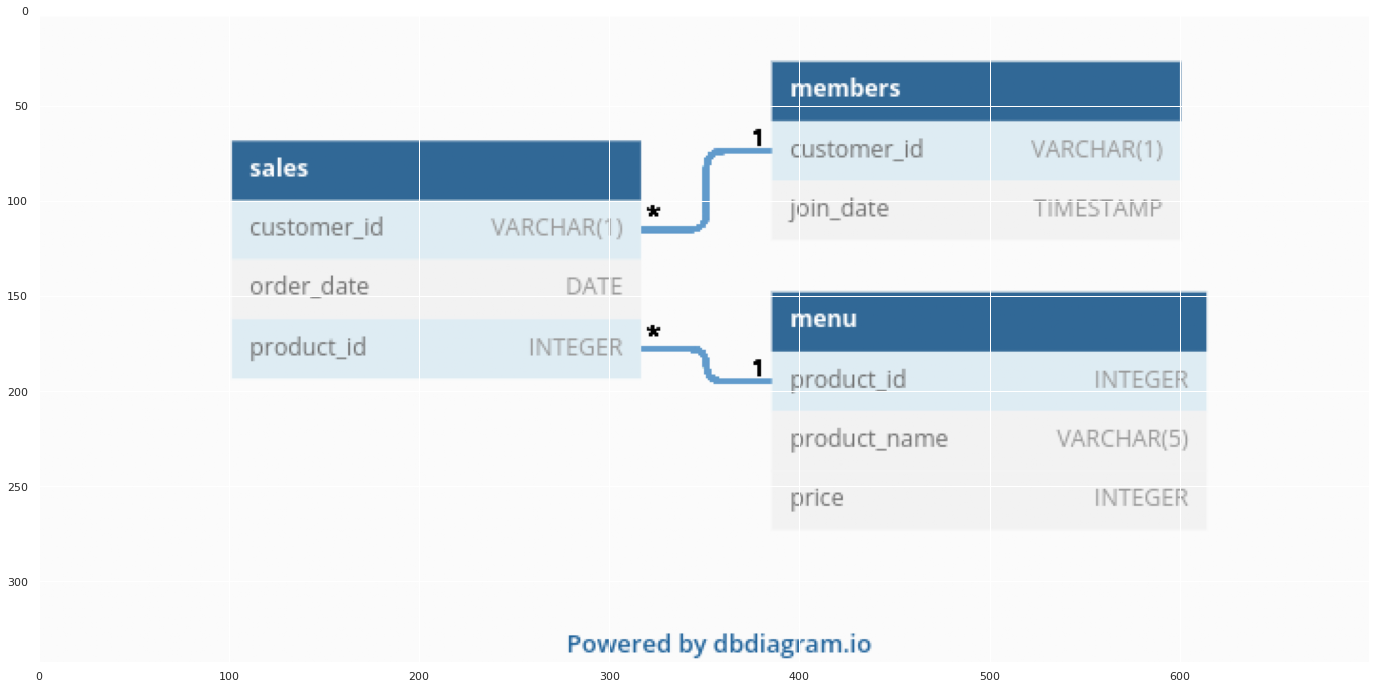

In [5]:
img = plt.imread('/home/tc0019/DS/SQL/challenge/schema1.png')
plt.imshow(img);

# 1.0 Connect to database 

In [6]:
db = create_engine('sqlite:////home/tc0019/DS/SQL/db/db_challenge1.sqlite', echo=False)
conn = db.connect()

## 1.1 Load Dataset

In [9]:
# df_customer = pd.read_csv('/home/tc0019/DS/SQL/raw_data/olist_customers_dataset.csv')

schema_sales = """
CREATE TABLE sales(
customer_id TEXT,
order_date TEXT,
product_id INTEGER,
)
"""

# crate schema
conn.execute( schema_sales )

# insert data into table
df_customer.to_sql( 'customer', con=conn, if_exists='append', index=False )

In [10]:
df_geolocation = pd.read_csv( '/home/tc0019/DS/SQL/raw_data/olist_geolocation_dataset.csv' )

schema_geolocation = """
CREATE TABLE geolocation(
geolocation_zip_code_prefix INTEGER,
geolocation_lat REAL,
geolocation_lng REAL,
geolocation_city TEXT,
geolocation_state TEXT
)
"""
# crate schema
conn.execute( schema_geolocation )

# insert data into table
df_geolocation.to_sql( 'geolocation', con=conn, if_exists='append', index=False)

In [11]:
df_order_items = pd.read_csv( '/home/tc0019/DS/SQL/raw_data/olist_order_items_dataset.csv' )

schema_order_items = """
CREATE TABLE order_items(
order_id TEXT,
order_item_id INTEGER,
product_id TEXT,
seller_id TEXT,
shipping_limit_date TEXT,
price REAL,
freight_value REAL
)
"""
# crate schema
conn.execute( schema_order_items )

# insert data into table
df_order_items.to_sql( 'order_items', con=conn, if_exists='append', index=False)

In [13]:
df_order_payments = pd.read_csv( '/home/tc0019/DS/SQL/raw_data/olist_order_payments_dataset.csv' )

schema_order_payments = """
CREATE TABLE order_payments(
order_id TEXT,
payment_sequential INTEGER,
payment_type TEXT,
payment_installments INTEGER,
payment_value REAL
)
"""
# crate schema
conn.execute( schema_order_payments )

# insert data into table
df_order_payments.to_sql( 'order_payments', con=conn, if_exists='append',index=False )

In [14]:
df_order_reviews = pd.read_csv( '/home/tc0019/DS/SQL/raw_data/olist_order_reviews_dataset.csv' )

schema_order_reviews = """
CREATE TABLE order_reviews(
review_id TEXT,
order_id TEXT,
review_score INTEGER,
review_comment_title TEXT,
review_comment_message TEXT,
review_creation_date TEXT,
review_answer_timestamp TEXT
)
"""
# crate schema
conn.execute( schema_order_reviews )

# insert data into table
df_order_reviews.to_sql( 'order_reviews', con=conn, if_exists='append',index=False )

In [15]:
df_orders = pd.read_csv( '/home/tc0019/DS/SQL/raw_data/olist_orders_dataset.csv' )

schema_orders = """
CREATE TABLE orders(
order_id TEXT,
customer_id TEXT,
order_status TEXT,
order_purchase_timestamp TEXT,
order_approved_at TEXT,
order_delivered_carrier_date TEXT,
order_delivered_customer_date TEXT,
order_estimated_delivery_date TEXT
)
"""
# crate schema
conn.execute( schema_orders )

# insert data into table
df_orders.to_sql( 'orders', con=conn, if_exists='append', index=False )

In [16]:
df_products = pd.read_csv( '/home/tc0019/DS/SQL/raw_data/olist_products_dataset.csv' )

schema_products = """
CREATE TABLE products(
product_id TEXT,
product_category_name TEXT,
product_name_lenght REAL,
product_description_lenght REAL,
product_photos_qty REAL,
product_weight_g REAL,
product_length_cm REAL,
product_height_cm REAL,
product_width_cm REAL
)
"""
# crate schema
conn.execute( schema_products )

# insert data into table
df_products.to_sql( 'products', con=conn, if_exists='append', index=False )

In [17]:
df_sellers = pd.read_csv( '/home/tc0019/DS/SQL/raw_data/olist_sellers_dataset.csv' )

schema_sellers = """
CREATE TABLE sellers(
seller_id TEXT,
seller_zip_code_prefix INTEGER,
seller_city TEXT,
seller_state TEXT
)
"""
# crate schema
conn.execute( schema_sellers )

# insert data into table
df_sellers.to_sql( 'sellers', con=conn, if_exists='append', index=False )

In [18]:
df_product_category_name = pd.read_csv( '/home/tc0019/DS/SQL/raw_data/product_category_name_translation.csv' )

schema_product_category_name = """
CREATE TABLE product_category_name(
product_category_name TEXT,
product_category_name_english TEXT
)
"""
# crate schema
conn.execute( schema_product_category_name )

# insert data into table
df_product_category_name.to_sql( 'product_category_name', con=conn,if_exists='append', index=False )

# 2.0 CHECK DATABASE

In [24]:
query="""
SELECT name
FROM sqlite_master
WHERE type = 'table'
"""

table=pd.read_sql_query(query, conn)
table

,name
0,customer
1,geolocation
2,order_items
3,order_payments
4,order_reviews
5,orders
6,products
7,sellers
8,product_category_name


In [25]:
query = """
SELECT *
FROM customer
"""

table=pd.read_sql_query(query, conn)
table

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [38]:
conn.close();